In [1]:
from keras.models import Model, load_model
from keras.layers import Dense,Reshape,Flatten,Input, MaxPooling1D, UpSampling1D, Dropout,Add,Activation,Conv1D
from keras.regularizers import l2
import os
import json
import sys
from keras.utils import plot_model

import json

2024-07-10 14:53:45.349061: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
input_dim = 40
input_layer=Input(shape=(input_dim,))

In [3]:
def fully_connected_block(x,hidden_layers,neurons,input_dimension,skip_connection=False):
    y=Dense(neurons,activation='relu')(x)
    for i in range(2,hidden_layers):
        y=Dense(neurons,activation='relu')(y)
    y=Dense(neurons)(y)
    if skip_connection:
        if input_dimension!=neurons:
            x=Dense(neurons)(x)
        y=Add()([x,y])
    y=Activation('relu')(y)
    return y

In [4]:
def convolutional_block(x,hidden_layers,kernel,size,input_dimension,strides=1,skip_connection=False):
    y=Conv1D(kernel,kernel_size=size,strides=strides,padding='same')(x)
    for i in range(2,hidden_layers):
        y=Conv1D(kernel,kernel_size=size,strides=strides,padding='same')(y)
    y=Conv1D(kernel,kernel_size=size,strides=strides,padding='same')(y)
    if skip_connection:
        if input_dimension!=kernel:
            x=Conv1D(kernel,kernel_size=1,strides=1,padding='same')(x)
        y=Add()([x,y])
    y=Activation('relu')(y)
    return y

In [11]:
x=Dense(16,activation='relu')(input_layer)
#inserire struttura rete
output_layer=Dense(1,activation='sigmoid')(x)

In [12]:
fcnn_CNN=Model(input_layer,output_layer)

fcnn_CNN.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 40)]              0         
                                                                 
 dense_87 (Dense)            (None, 16)                656       
                                                                 
 dense_88 (Dense)            (None, 32)                544       
                                                                 
 dense_89 (Dense)            (None, 32)                1056      
                                                                 
 dense_90 (Dense)            (None, 32)                1056      
                                                                 
 activation_39 (Activation)  (None, 32)                0         
                                                                 
 dense_91 (Dense)            (None, 32)                1056

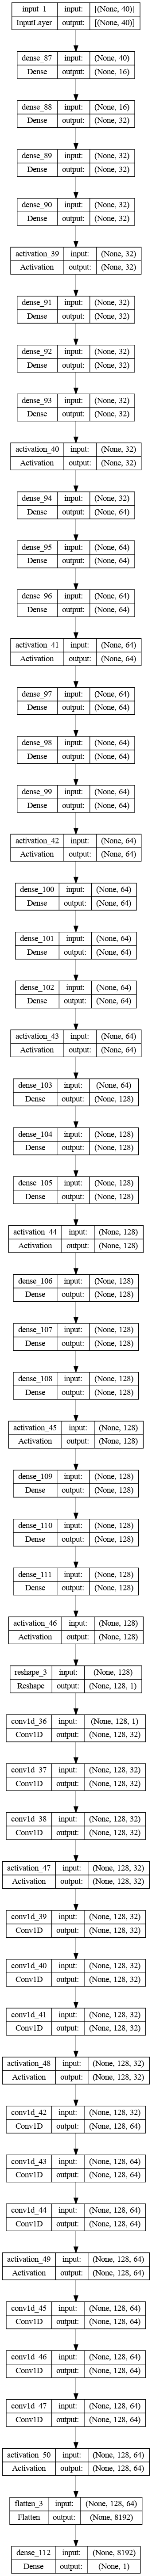

In [13]:
plot_model(fcnn_CNN,show_shapes=True)

In [14]:
modello_json = fcnn_CNN.to_json()

# Salva la rappresentazione JSON del modello in un file
with open('fcnn_CNN.json', 'w') as f:
    f.write(modello_json)

with open('summary.txt', 'w') as f:
    fcnn_CNN.summary(print_fn=lambda x: f.write(x + '\n'))